In [110]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
pd.pandas.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset
df = pd.read_csv('C:/Users/shank/Desktop/diamonds.csv', header=[0])

# Dimension of the dataframe
df.shape

(53940, 10)

In [111]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [112]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [113]:
bool_series = pd.isnull(df)
bool_series

,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False


In [114]:
#EDA

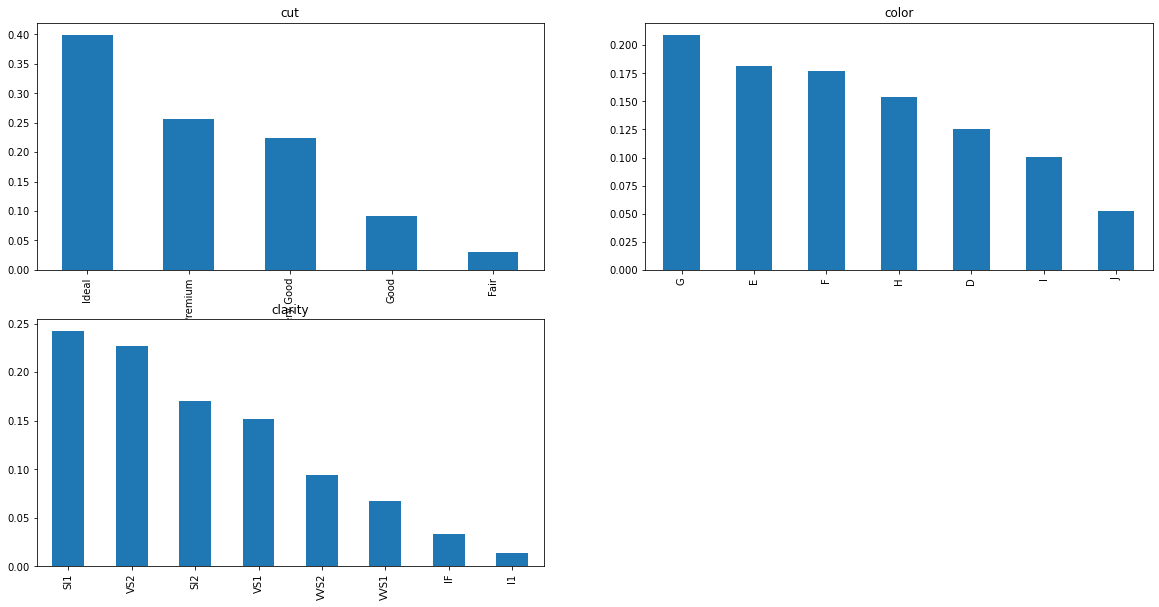

In [115]:
plt.figure(1)
plt.subplot(221)
df['cut'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='cut')
plt.subplot(222)
df['color'].value_counts(normalize=True).plot.bar(title='color')
plt.subplot(223)
df['clarity'].value_counts(normalize=True).plot.bar(title='clarity')
plt.show()

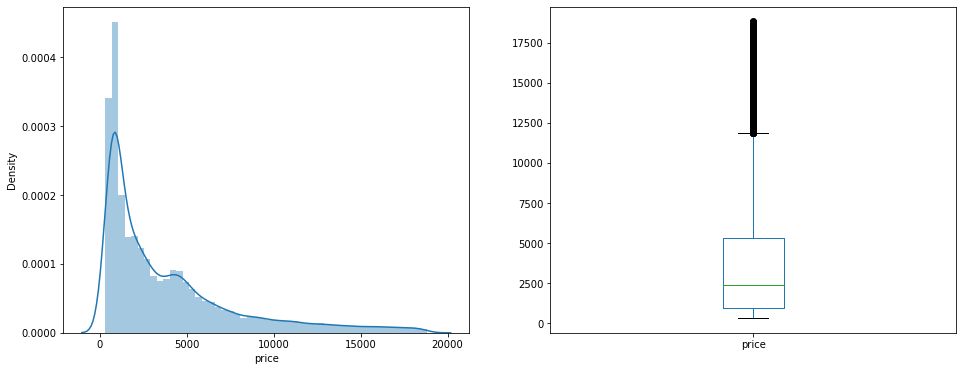

In [116]:
plt.figure(1)
plt.subplot(121)
sb.distplot(df['price']);
plt.subplot(122)
df['price'].plot.box(figsize = (16,6))
plt.show()

In [117]:
dfx = df.drop(['price'],axis=1)
dfx

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [118]:
# select categorical data and apply get_dummies function on them
categorical_df = df.select_dtypes(include=['object',"category"])
dummies = pd.get_dummies(categorical_df, drop_first=True)

In [119]:
# drop categories for which we created dummy variables
df = df.drop(list(categorical_df.columns), axis=1)

# concat both dummy vars df and original df
df = pd.concat([df,dummies], axis=1)


In [120]:
df

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [138]:
#defining dependent and independent variables
x = df.drop(['price'],axis=1)
y = df['price']

In [139]:
x = sm.add_constant(x)

In [140]:
x

,const,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1.0,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1.0,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,1.0,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1.0,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,1.0,0.72,60.8,57.0,5.75,5.76,3.50,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,1.0,0.72,63.1,55.0,5.69,5.75,3.61,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,1.0,0.70,62.8,60.0,5.66,5.68,3.56,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,1.0,0.86,61.0,58.0,6.15,6.12,3.74,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [124]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [125]:
result = sm.OLS(y, x).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Tue, 06 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:19:16   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53916   BIC:                         9.117e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2184.4774    408.197      5.352

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfx['cut'] = dfx['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
dfx['clarity'] = dfx['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':6})
dfx['color'] = dfx['color'].map({'D':0, 'E':1, 'F':2, 'G':3, 'H':4, 'I':5, 'J':6})

vif_data = pd.DataFrame()
vif_data["feature"] = dfx.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dfx.values, i)
                          for i in range(len(dfx.columns))]
  
print(vif_data)

   feature          VIF
0    carat    74.059963
1      cut     8.857497
2    color     3.723118
3  clarity     5.611804
4    depth   570.727251
5    table   545.805375
6        x  1354.976344
7        y   531.807945
8        z   562.700049


In [126]:
dfx = dfx.drop(['x'],axis=1)
dfx = dfx.drop(['depth'],axis=1)
dfx = dfx.drop(['y'],axis=1)
dfx = dfx.drop(['z'],axis=1)
dfx = dfx.drop(['table'],axis=1)



In [127]:
dfx

,carat,cut,color,clarity
0,0.23,Ideal,E,SI2
1,0.21,Premium,E,SI1
2,0.23,Good,E,VS1
3,0.29,Premium,I,VS2
4,0.31,Good,J,SI2
...,...,...,...,...
53935,0.72,Ideal,D,SI1
53936,0.72,Good,D,SI1
53937,0.70,Very Good,D,SI1
53938,0.86,Premium,H,SI2


In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfx['cut'] = dfx['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
dfx['clarity'] = dfx['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':6})
dfx['color'] = dfx['color'].map({'D':0, 'E':1, 'F':2, 'G':3, 'H':4, 'I':5, 'J':6})

vif_data = pd.DataFrame()
vif_data["feature"] = dfx.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dfx.values, i)
                          for i in range(len(dfx.columns))]
  
print(vif_data)

   feature       VIF
0    carat  3.399477
1      cut  5.287599
2    color  3.603023
3  clarity  4.104920


In [145]:
#dropping varibles with very high VIF
x = x.drop(['depth'],axis=1)
x = x.drop(['x'],axis=1)
x = x.drop(['y'],axis=1)
x = x.drop(['z'],axis=1)
x = x.drop(['table'],axis=1)

In [129]:
#Test for Heteroscedasticity

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value']
test = sms.het_breuschpagan(result.resid, result.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 11482.61404152136),
 ('p-value', 0.0),
 ('f-value', 633.9826082558387)]

In [142]:
#performing log transformation on y variable to remove Heteroscidasticity

y = np.log(y)

In [143]:
y

0        5.786897
1        5.786897
2        5.789960
3        5.811141
4        5.814131
           ...   
53935    7.921898
53936    7.921898
53937    7.921898
53938    7.921898
53939    7.921898
Name: price, Length: 53940, dtype: float64

In [146]:
x

,const,carat,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.0,0.23,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1.0,0.21,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1.0,0.23,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,1.0,0.29,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1.0,0.31,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,1.0,0.72,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,1.0,0.72,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,1.0,0.70,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,1.0,0.86,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [150]:
#Running OLS regression again after removing Multicollinearity and Heteroscedasticty

result2 = sm.OLS(y, x).fit()

print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 2.387e+04
Date:                Tue, 06 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:21:49   Log-Likelihood:                -18162.
No. Observations:               53940   AIC:                         3.636e+04
Df Residuals:                   53921   BIC:                         3.653e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.3530      0.015    353.553